In [2]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import normaltest





import warnings
warnings.filterwarnings('ignore')

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
Jan17 = pd.read_csv('/Users/NickThomas/Project_Luther/data/Video_Game_Sales_as_of_Jan_2017.csv')
Dec16 = pd.read_csv('/Users/NickThomas/Project_Luther/data/Video_Games_Sales_as_at_22_Dec_2016.csv')
dfs = [Jan17, Dec16]
#Steam_kaggle = pd.concat(dfs)
Steam_kaggle = pd.read_csv('/Users/NickThomas/Project_Luther/data/Video_Game_Sales_as_of_Jan_2017.csv')

In [14]:
Steam_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
Name               17416 non-null object
Platform           17416 non-null object
Year_of_Release    17408 non-null float64
Genre              17416 non-null object
Publisher          17415 non-null object
NA_Sales           17416 non-null float64
EU_Sales           17416 non-null float64
JP_Sales           17416 non-null float64
Other_Sales        17416 non-null float64
Global_Sales       17416 non-null float64
Critic_Score       8336 non-null float64
Critic_Count       8336 non-null float64
User_Score         7798 non-null float64
User_Count         7798 non-null float64
Rating             10252 non-null object
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [15]:
Steam_kaggle.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [16]:
Steam_kaggle.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2015.,
       2011., 1998., 2012., 2014., 2016., 1992., 1997., 1993., 1994.,
       1982., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1978., 1977., 1976., 1979.,   nan, 2017.])

In [17]:
Steam_kaggle['User_Score'] = Steam_kaggle.User_Score.replace('tbd', np.NaN)

In [18]:
Steam_kaggle = Steam_kaggle[Steam_kaggle.User_Score.notnull()]
Steam_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7798 entries, 0 to 17407
Data columns (total 15 columns):
Name               7798 non-null object
Platform           7798 non-null object
Year_of_Release    7798 non-null float64
Genre              7798 non-null object
Publisher          7798 non-null object
NA_Sales           7798 non-null float64
EU_Sales           7798 non-null float64
JP_Sales           7798 non-null float64
Other_Sales        7798 non-null float64
Global_Sales       7798 non-null float64
Critic_Score       7191 non-null float64
Critic_Count       7191 non-null float64
User_Score         7798 non-null float64
User_Count         7798 non-null float64
Rating             7702 non-null object
dtypes: float64(10), object(5)
memory usage: 974.8+ KB


In [19]:
Steam_kaggle = Steam_kaggle[Steam_kaggle.Critic_Score.notnull()]
Steam_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7191 entries, 0 to 17407
Data columns (total 15 columns):
Name               7191 non-null object
Platform           7191 non-null object
Year_of_Release    7191 non-null float64
Genre              7191 non-null object
Publisher          7191 non-null object
NA_Sales           7191 non-null float64
EU_Sales           7191 non-null float64
JP_Sales           7191 non-null float64
Other_Sales        7191 non-null float64
Global_Sales       7191 non-null float64
Critic_Score       7191 non-null float64
Critic_Count       7191 non-null float64
User_Score         7191 non-null float64
User_Count         7191 non-null float64
Rating             7112 non-null object
dtypes: float64(10), object(5)
memory usage: 898.9+ KB


In [20]:
Steam_kaggle['User_Score'] = Steam_kaggle.User_Score.astype(float)

In [21]:
Steam_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7191 entries, 0 to 17407
Data columns (total 15 columns):
Name               7191 non-null object
Platform           7191 non-null object
Year_of_Release    7191 non-null float64
Genre              7191 non-null object
Publisher          7191 non-null object
NA_Sales           7191 non-null float64
EU_Sales           7191 non-null float64
JP_Sales           7191 non-null float64
Other_Sales        7191 non-null float64
Global_Sales       7191 non-null float64
Critic_Score       7191 non-null float64
Critic_Count       7191 non-null float64
User_Score         7191 non-null float64
User_Count         7191 non-null float64
Rating             7112 non-null object
dtypes: float64(10), object(5)
memory usage: 898.9+ KB


Year_of_Release   -0.251749
User_Count         0.019976
EU_Sales           0.055120
Other_Sales        0.056990
NA_Sales           0.086017
Global_Sales       0.088211
JP_Sales           0.127574
Critic_Count       0.193619
Critic_Score       0.582705
User_Score         1.000000
Name: User_Score, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

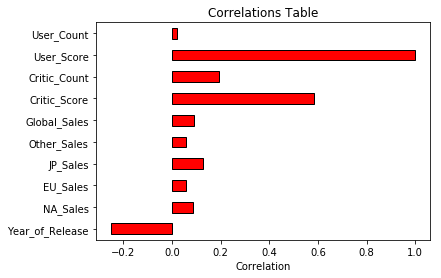

In [22]:
Steam_kaggle.corr()['User_Score'].plot.barh(color='red', edgecolor='black')
print(Steam_kaggle.corr()['User_Score'].sort_values())
plt.xlabel("Correlation")
plt.title("Correlations Table")
plt.show

In [23]:
Steam_kaggle_nonull = Steam_kaggle.dropna()

In [24]:
ssX = StandardScaler()

x_list = ['Critic_Score', 'Critic_Count', 'Year_of_Release', 'Global_Sales']
#x_list = ['Critic_Score', 'Critic_Count', 'JP_Sales', 'NA_Sales', 'Global_Sales', 'Other_Sales', 'EU_Sales']

X = Steam_kaggle_nonull[x_list]
y = Steam_kaggle_nonull.User_Score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

7.176377952755945
1.4444960736440318
0.5
9.6


(array([  13.,   47.,   95.,  180.,  303.,  589., 1092., 1784., 2218.,
         791.]),
 array([0.5 , 1.41, 2.32, 3.23, 4.14, 5.05, 5.96, 6.87, 7.78, 8.69, 9.6 ]),
 <a list of 10 Patch objects>)

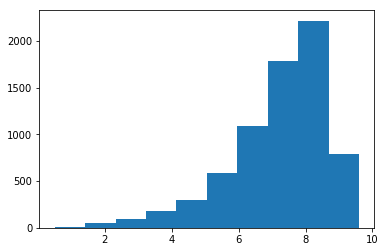

In [25]:
print(Steam_kaggle_nonull.User_Score.mean())
print(Steam_kaggle_nonull.User_Score.std())
print(Steam_kaggle_nonull.User_Score.min())
print(Steam_kaggle_nonull.User_Score.max())

#print(Steam_kaggle_nonull.Critic_Score < 28)

plt.hist(Steam_kaggle_nonull.User_Score)


#critic score out = 28
#Critic count out = 87.59
# global_sales = 6.66
#User Rating = 2.86

(array([3.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 3.600e+01, 6.300e+01,
        1.650e+02, 5.070e+02, 2.042e+03, 4.283e+03]),
 array([-0.69314718, -0.39765615, -0.10216512,  0.1933259 ,  0.48881693,
         0.78430796,  1.07979899,  1.37529001,  1.67078104,  1.96627207,
         2.2617631 ]),
 <a list of 10 Patch objects>)

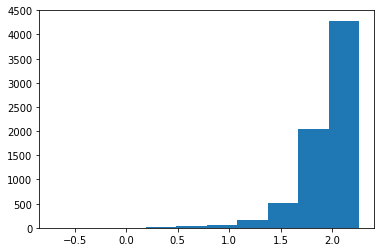

In [26]:
Steam_kaggle_nonull['User_Score_log']=np.log(Steam_kaggle_nonull.User_Score)
plt.hist(Steam_kaggle_nonull.User_Score_log)


In [27]:
model = Lasso(max_iter=5000)
parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
grid = GridSearchCV(model,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=1)
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.001, 0.1, 1], 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [28]:
grid.cv_results_

{'mean_fit_time': array([0.08788152, 0.02190003, 0.00250545, 0.01059899, 0.00196261,
        0.00568457, 0.00188661, 0.00418816]),
 'std_fit_time': array([1.69414791e-01, 3.25259522e-03, 2.11506528e-04, 5.80910782e-04,
        8.44337644e-05, 4.93757645e-04, 7.99428553e-05, 2.05913976e-04]),
 'mean_score_time': array([0.00764999, 0.00066423, 0.00056229, 0.00044904, 0.00043068,
        0.00043912, 0.00040984, 0.00042601]),
 'std_score_time': array([1.40076678e-02, 1.19724970e-04, 7.17815904e-05, 3.53592035e-05,
        4.30634381e-06, 8.09697015e-06, 2.32411037e-05, 5.25040802e-06]),
 'param_alpha': masked_array(data=[1e-05, 1e-05, 0.001, 0.001, 0.1, 0.1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, False, True, False, True, False, True, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
    

In [29]:
type(grid.best_estimator_)

sklearn.linear_model.coordinate_descent.Lasso

In [30]:
best_lasso = grid.best_estimator_
lasso_pred = best_lasso.predict(X_test)
for true,pred in zip(y_test[:20], lasso_pred[:20]):
    resid = true - pred
    print("pred, resid:", str(pred) + ", "+ str(resid))

pred, resid: 6.71755540603894, -2.71755540603894
pred, resid: 6.758513999217797, -0.9585139992177973
pred, resid: 6.843190854126874, 2.0568091458731264
pred, resid: 6.32344547709053, -0.3234454770905302
pred, resid: 5.055865695635106, -0.15586569563510544
pred, resid: 6.93000269621038, -0.93000269621038
pred, resid: 6.929983570729405, 0.37001642927059475
pred, resid: 7.581272824238141, 0.6187271757618582
pred, resid: 8.24467055630609, 0.5553294436939105
pred, resid: 7.435680469899097, 1.064319530100903
pred, resid: 8.34491723995123, -1.444917239951229
pred, resid: 9.130016208101807, 0.2699837918981931
pred, resid: 7.755154526520215, -1.9551545265202153
pred, resid: 7.298553867102044, 0.20144613289795643
pred, resid: 6.377059606691205, -0.6770596066912047
pred, resid: 6.88447094127676, 0.5155290587232404
pred, resid: 5.435828054570777, -1.835828054570777
pred, resid: 6.952628479972304, -0.9526284799723044
pred, resid: 6.733128581263088, -1.1331285812630885
pred, resid: 5.01160247162116,

In [31]:
print(grid.best_params_, grid.best_score_)

{'alpha': 0.1, 'fit_intercept': True} -0.8395986280253944


In [32]:
#somehow this feels like an importvement

lr2 = Lasso(alpha = 0.1)
lr2.fit(X_train, y_train)
score2 = lr2.score(X_test, y_test)
print("Lasso Regression: ", score2)

y_pred = lr2.predict(X_test)
y_pred2 = lr2.predict(X_train)
print("Coef:", lr2.coef_)
print("MSE train:", mean_squared_error(y_train, y_pred2))
print("MAE train:", mean_absolute_error(y_train, y_pred2))
print("MSE test:", mean_squared_error(y_test, y_pred))
print("MAE test:", mean_absolute_error(y_test, y_pred))


lr3 = Ridge()
lr3.fit(X_train, y_train)
score3 = lr3.score(X_test, y_test)
print("Ridge Regression: ", score3)
print("Coef:", lr3.coef_)
y_pred3 = lr3.predict(X_test)
y_pred4 = lr3.predict(X_train)
print("MSE train:", mean_squared_error(y_train, y_pred4))
print("MAE train:", mean_absolute_error(y_train, y_pred4))
print("MSE test:", mean_squared_error(y_test, y_pred3))
print("MAE test:", mean_absolute_error(y_test, y_pred3))



Lasso Regression:  0.3910915043457778
Coef: [ 0.06059068  0.00070836 -0.07927391 -0.00663287]
MSE train: 1.2224525027261681
MAE train: 0.8292445281214973
MSE test: 1.3012656877675903
MAE test: 0.8486214064463444
Ridge Regression:  0.3946741909623842
Coef: [ 0.0613633   0.00184845 -0.08551564 -0.03317156]
MSE train: 1.218982939329413
MAE train: 0.8284996471334134
MSE test: 1.2936093203536243
MAE test: 0.8463332092166953


<function matplotlib.pyplot.show(*args, **kw)>

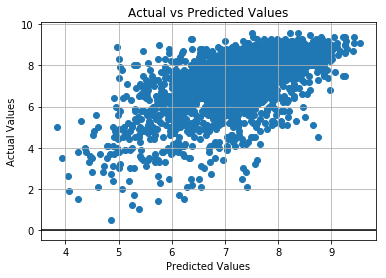

In [33]:
plt.scatter(y_pred3, y_test)
plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values")
plt.show


In [32]:
import matplotlib
matplotlib.style.use('fivethirtyeight') 

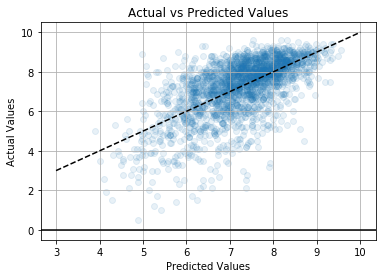

In [34]:

plt.scatter(y_pred, y_test,alpha=0.1)
plt.axhline(y=0, color='k')
plt.plot([3,10],[3,10], 'k--')
plt.grid()
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Actual vs Predicted Values")
plt.show()

(-10, 10)

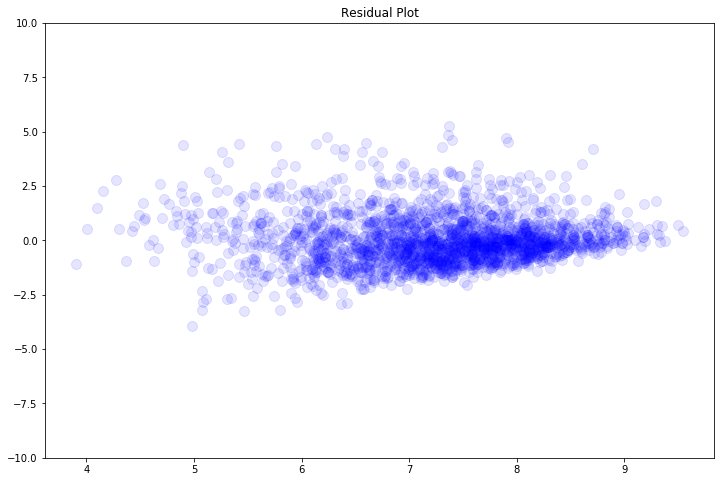

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred, y_pred - y_test, c='blue', alpha=0.1, s=100, label='(Testing Residuals)')

plt.title("Residual Plot")
plt.ylim(-10,10)


In [37]:
lm2 = smf.ols('User_Score ~ Critic_Score + Critic_Count + Year_of_Release + Global_Sales', data=Steam_kaggle)
# Fit the model
fit2 = lm2.fit()
# Check out the results
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             User_Score   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     1209.
Date:                Fri, 27 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:10:56   Log-Likelihood:                -10996.
No. Observations:                7191   AIC:                         2.200e+04
Df Residuals:                    7186   BIC:                         2.204e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         172.9605      6.362     27.185      0.000     160.488     185.433
Critic_Score        0.0604      0.001     57.830      0.000       0.058       0.062
Critic_Count        0.0023      0.001      2.979      0.003       0.001       0.004
Year_of_Release    -0.0847      0.003    -26.739      0.000      -0.091      -0.079
Global_Sales       -0.0430      0.007     -5.953      0.000      -0.057      -0.029
==============================================================================
Omnibus:                     1080.255   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2128.740
Skew:                          -0.928   Prob(JB):                         0.00
Kurtosis:                       4.914   Cond. No.                     9.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

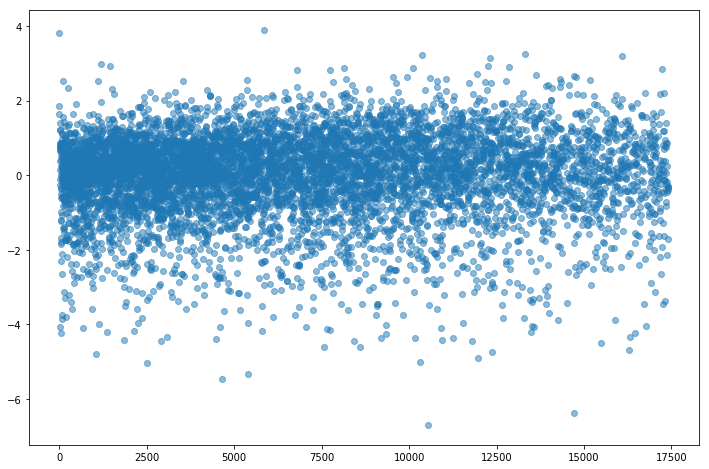

In [38]:
fit2.resid.plot(style='o', figsize=(12,8), alpha = 0.5)

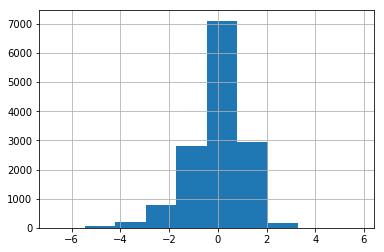

In [170]:
fit2.resid.hist()

**make histogram of above**

Text(0.5,1,'Polynomial Degree 2 Model on Training Data')

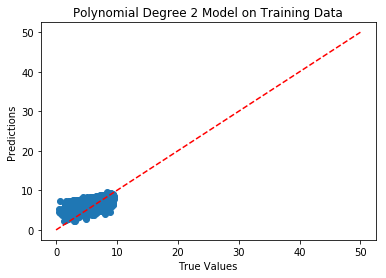

In [57]:
Poly_feat_2_fit = PolynomialFeatures(2).fit(X_train)
X_train_poly_degree2 = Poly_feat_2_fit.transform(X_train)
lr = LinearRegression()
lr_degree_2_fit= lr.fit(X_train_poly_degree2, y_train)
lr_degree2_pred_train = lr.predict(X_train_poly_degree2)
plt.scatter(y_train, lr_degree2_pred_train)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 2 Model on Training Data')

Text(0.5,1,'Polynomial Degree 3 Model on Training Data')

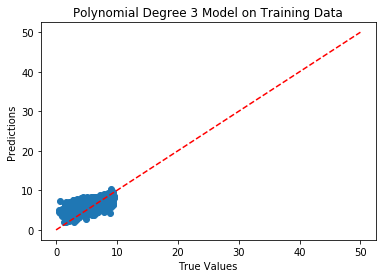

In [58]:
Poly_feat_3_fit = PolynomialFeatures(3).fit(X_train)
X_train_poly_degree3 = Poly_feat_3_fit.transform(X_train)
lr = LinearRegression()
lr_degree_3_fit= lr.fit(X_train_poly_degree3, y_train)
lr_degree3_pred_train = lr.predict(X_train_poly_degree3)
plt.scatter(y_train, lr_degree3_pred_train)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 3 Model on Training Data')

Text(0.5,1,'Polynomial Degree 4 Model on Training Data')

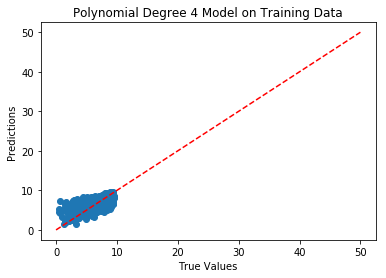

In [59]:
Poly_feat_4_fit = PolynomialFeatures(4).fit(X_train)
X_train_poly_degree4 = Poly_feat_4_fit.transform(X_train)
lr = LinearRegression()
lr_degree_4_fit= lr.fit(X_train_poly_degree4, y_train)
lr_degree4_pred_train = lr.predict(X_train_poly_degree4)
plt.scatter(y_train, lr_degree4_pred_train)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 4 Model on Training Data')

Text(0.5,1,'Polynomial Degree 5 Model on Training Data')

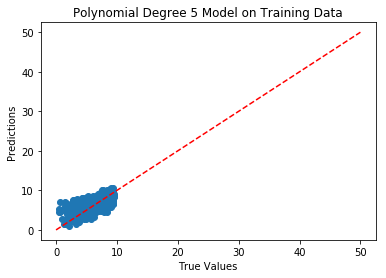

In [60]:
Poly_feat_5_fit = PolynomialFeatures(5).fit(X_train)
X_train_poly_degree5 = Poly_feat_5_fit.transform(X_train)
lr = LinearRegression()
lr_degree_5_fit= lr.fit(X_train_poly_degree5, y_train)
lr_degree5_pred_train = lr.predict(X_train_poly_degree5)
plt.scatter(y_train, lr_degree5_pred_train)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 5 Model on Training Data')

Text(0.5,1,'Polynomial Degree 6 Model on Training Data')

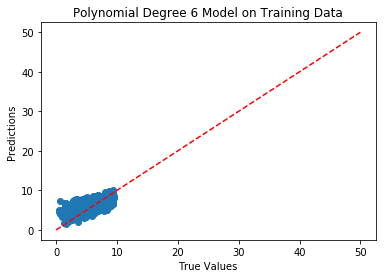

In [61]:
Poly_feat_6_fit = PolynomialFeatures(6).fit(X_train)
X_train_poly_degree6 = Poly_feat_6_fit.transform(X_train)
lr = LinearRegression()
lr_degree_6_fit= lr.fit(X_train_poly_degree6, y_train)
lr_degree6_pred_train = lr.predict(X_train_poly_degree6)
plt.scatter(y_train, lr_degree6_pred_train)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 6 Model on Training Data')

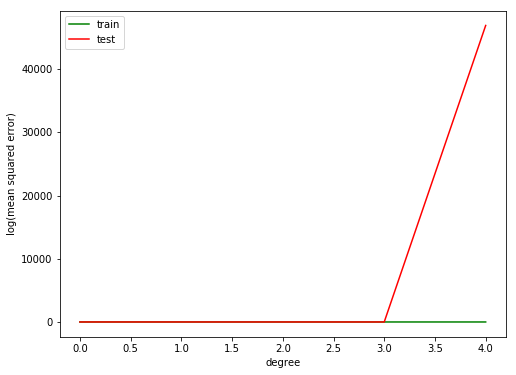

In [62]:
train_error = np.empty(5)
test_error = np.empty(5)
for degree in range(5):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train))
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test))

plt.figure(figsize=(8,6))
plt.plot(np.arange(5), train_error, color='green', label='train')
plt.plot(np.arange(5), test_error, color='red', label='test')
#plt.ylim((0.0, 1e0))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left');

In [63]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)
    
def plot_coefficients(est, ax, label=None, yscale='log'):
    coef = est.steps[-1][1].coef_.ravel()
    if yscale == 'log':
        ax.semilogy(np.abs(coef), marker='o', label=label)
        ax.set_ylim((1e-1, 1e8))
    else:
        ax.plot(np.abs(coef), marker='o', label=label)
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.set_xlim((1, 9))

ValueError: x and y must be the same size

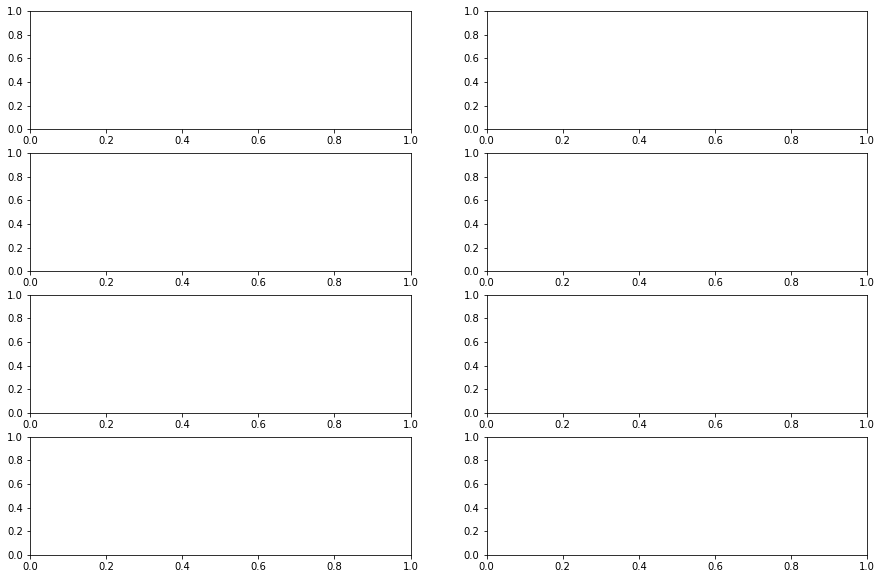

In [64]:
fig, ax_rows = plt.subplots(4, 2, figsize=(15, 10))

# Plot the results next to the coefficient values for each of hte 2 alphas
degree = 3
alphas = [1e-4, 1e-2, 1e-1, 1,]
for alpha, ax_row in zip(alphas, ax_rows):
    ax_left, ax_right = ax_row
    est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_train, y_train)
    plot_approximation(est, ax_left, label='alpha=%r' % alpha)
    plot_coefficients(est, ax_right, label='Lasso(alpha=%r) coefficients' % alpha, yscale=None)

plt.tight_layout()
